# Machine Learning - Logistic Regression

In [17]:
# Importing Necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [7]:
# Reading data from a url
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)


## 1. Statistical Analysis

In [8]:
# checking first 5 rows of dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Checking last 5 rows of dataset
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
# Checking total rows and columns
df.shape


(891, 12)

In [12]:
# Checking all the information of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# Checking the overall stats of data
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# Selecting the only needed columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


## 2. Data Pre-Processing

#### Step 1. Handling Null Values

In [16]:
# Checking the null values in each column
df.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0


#### Step 2. Imputing to fill the null values

In [23]:
# Using simple imputer to fill in the null rows by using mean strategy
imputer = SimpleImputer(strategy = 'mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
...,...,...,...,...,...
886,0,2,male,27.000000,13.0000
887,1,1,female,19.000000,30.0000
888,0,3,female,29.699118,23.4500
889,1,1,male,26.000000,30.0000


In [24]:
# Checking null values again
df.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


#### Step 3. Encoding By Label Encoder

In [26]:
# Encoding Sex to change it into
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Sex']


,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


## 3. Selecting Features And Target

In [27]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.000000,7.2500
1,1,1,0,38.000000,71.2833
2,1,3,0,26.000000,7.9250
3,1,1,0,35.000000,53.1000
4,0,3,1,35.000000,8.0500
...,...,...,...,...,...
886,0,2,1,27.000000,13.0000
887,1,1,0,19.000000,30.0000
888,0,3,0,29.699118,23.4500
889,1,1,1,26.000000,30.0000


In [29]:
# Choosing the features as 'x'
x = df.drop(['Survived'], axis = 1)
x

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


In [30]:
# Choosing y as target
y = df['Survived']
y


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


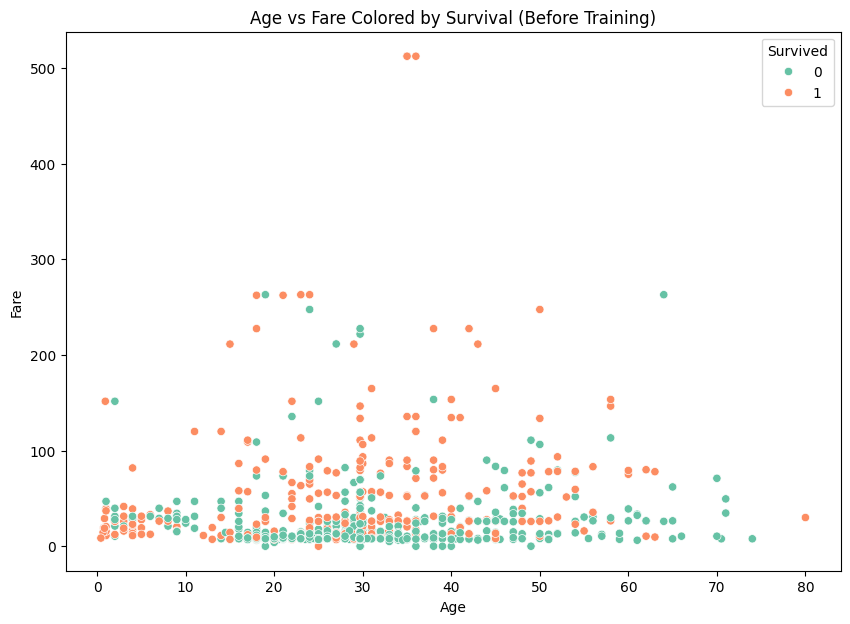

In [52]:
# Visulaizing using Scatterplot
# Deciding Figure Size
plt.figure(figsize = (10, 7))
sns.scatterplot(df, x='Age', y='Fare', hue='Survived', palette = 'Set2')

# Deciding the title
plt.title('Age vs Fare Colored by Survival (Before Training)')

# Show scatterplot
plt.show()


## 4. Splitting Dataset ( Train and Test )

In [62]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42)


In [63]:
# Checking how much data both the test and train set got
X_train.shape, X_test.shape


((712, 4), (179, 4))

## 5. Training on Logistic Regression

In [35]:
# Training on the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

## 6. Prediction

In [36]:
# Predicting on model
y_pred = lr.predict(X_test)


## 7. Evaluating The Model

In [37]:
Accuracy = accuracy_score(y_test, y_pred)
conMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)


In [54]:
# Printing
print(f"Accuracy: {Accuracy:.2f}")
print()
print("Classification Report:\n", classReport)


Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [59]:
# Getting the accuracy for both training and testing dataset
print(f"Accuracy of training DataSet: {lr.score(X_train, y_train):.2f}")
print(f"Accuracy of testing DataSet: {lr.score(X_test, y_test):.2f}")


Accuracy of training DataSet: 0.79
Accuracy of testing DataSet: 0.80


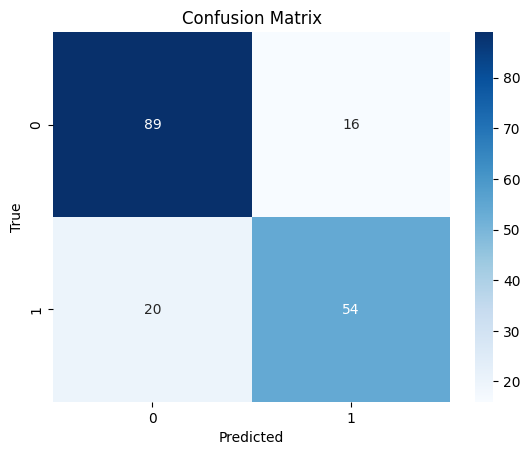

In [45]:
# Visualizing Confusion Matrix
sns.heatmap(conMatrix, annot = True, fmt= 'd', cmap= 'Blues')

# Deciding titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show heatmap
plt.show()
